In [46]:
import pandas as pd

In [47]:
df_orig=pd.read_csv(r"/media/tanmay/Local Disk/Data Science/Competitons Data/twitter sentimenr analysis/train_E6oV3lV.csv")
df_test_orig=pd.read_csv(r"/media/tanmay/Local Disk/Data Science/Competitons Data/twitter sentimenr analysis/test_tweets_anuFYb8.csv")
sample=pd.read_csv(r"/media/tanmay/Local Disk/Data Science/Competitons Data/twitter sentimenr analysis/sample_submission_3Mm4cJo.csv")


In [48]:
label=df_orig['label']

In [49]:
df_orig.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [50]:
len(df_orig)

31962

In [51]:
df_orig.shape

(31962, 3)

In [52]:
df_orig['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [53]:
df_test_orig.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [54]:
sample.head()

,id,label


In [55]:
df=df_orig.copy()
df_test=df_test_orig.copy()

In [56]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=stopwords.words('english')

In [57]:
import nltk


In [58]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [59]:
df['cleaned tweets']=df['tweet'].replace(to_replace=r'@\S+',value="",regex=True)
df_test['cleaned tweets']=df_test['tweet'].replace(to_replace=r'@\S+',value="",regex=True)

In [60]:
df.head()

,id,label,tweet,cleaned tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [61]:
df["cleaned tweets1"]=df['cleaned tweets'].replace(to_replace=r'[^A-Za-z0-9]+',value=" ",regex=True)
df_test["cleaned tweets1"]=df_test['cleaned tweets'].replace(to_replace=r'[^A-Za-z0-9]+',value=" ",regex=True)

In [62]:
df.head()

,id,label,tweet,cleaned tweets,cleaned tweets1
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so self...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,thanks for lyft credit i can t use cause they...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation


In [63]:
df["cleaned tweets"]=df['cleaned tweets'].replace(to_replace=r'[^A-Za-z0-9]+',value=" ",regex=True)
df_test["cleaned tweets"]=df_test['cleaned tweets'].replace(to_replace=r'[^A-Za-z0-9]+',value=" ",regex=True)

In [64]:
df.head()

,id,label,tweet,cleaned tweets,cleaned tweets1
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so self...,when a father is dysfunctional and is so self...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they...,thanks for lyft credit i can t use cause they...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation


In [65]:
df["cleaned tweets"] = df["cleaned tweets"].apply(lambda x: x.split())
df_test["cleaned tweets"]=df_test['cleaned tweets'].apply(lambda x: x.split())

In [66]:
df.head()

,id,label,tweet,cleaned tweets,cleaned tweets1
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ...",when a father is dysfunctional and is so self...
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can, t, use, ca...",thanks for lyft credit i can t use cause they...
2,3,0,bihday your majesty,"[bihday, your, majesty]",bihday your majesty
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t...",model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]",factsguide society now motivation


In [67]:
df_test.head()

,id,tweet,cleaned tweets,cleaned tweets1
0,31963,#studiolife #aislife #requires #passion #dedic...,"[studiolife, aislife, requires, passion, dedic...",studiolife aislife requires passion dedicatio...
1,31964,@user #white #supremacists want everyone to s...,"[white, supremacists, want, everyone, to, see,...",white supremacists want everyone to see the n...
2,31965,safe ways to heal your #acne!! #altwaystohe...,"[safe, ways, to, heal, your, acne, altwaystohe...",safe ways to heal your acne altwaystoheal heal...
3,31966,is the hp and the cursed child book up for res...,"[is, the, hp, and, the, cursed, child, book, u...",is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","[3rd, bihday, to, my, amazing, hilarious, neph...",3rd bihday to my amazing hilarious nephew eli...


In [68]:
# df['cleaned tweets']=df.apply(lambda x: word_tokenize(x['cleaned tweets']), axis=1 )
df["cleaned tweets"]=df['cleaned tweets'].apply(lambda x: [item for item in x if item not in stop_words])
df_test["cleaned tweets"]=df_test['cleaned tweets'].apply(lambda x: [item for item in x if item not in stop_words])

In [69]:
df_test.head()

,id,tweet,cleaned tweets,cleaned tweets1
0,31963,#studiolife #aislife #requires #passion #dedic...,"[studiolife, aislife, requires, passion, dedic...",studiolife aislife requires passion dedicatio...
1,31964,@user #white #supremacists want everyone to s...,"[white, supremacists, want, everyone, see, new...",white supremacists want everyone to see the n...
2,31965,safe ways to heal your #acne!! #altwaystohe...,"[safe, ways, heal, acne, altwaystoheal, health...",safe ways to heal your acne altwaystoheal heal...
3,31966,is the hp and the cursed child book up for res...,"[hp, cursed, child, book, reservations, alread...",is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","[3rd, bihday, amazing, hilarious, nephew, eli,...",3rd bihday to my amazing hilarious nephew eli...


In [70]:
from nltk.stem import SnowballStemmer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer=SnowballStemmer("english")
# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in text]


# df['lemmed'] = df['cleaned tweets'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
df['stemmed']= df['cleaned tweets'].apply(lambda x: [stemmer.stem(w) for w in x])
df_test['stemmed']= df_test['cleaned tweets'].apply(lambda x: [stemmer.stem(w) for w in x])

In [71]:
df.head()

,id,label,tweet,cleaned tweets,cleaned tweets1,stemmed
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ...",when a father is dysfunctional and is so self...,"[father, dysfunct, selfish, drag, kid, dysfunc..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, lyft, credit, use, cause, offer, whee...",thanks for lyft credit i can t use cause they...,"[thank, lyft, credit, use, caus, offer, wheelc..."
2,3,0,bihday your majesty,"[bihday, majesty]",bihday your majesty,"[bihday, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, ur]",model i love u take with u all the time in ur,"[model, love, u, take, u, time, ur]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]",factsguide society now motivation,"[factsguid, societi, motiv]"


In [72]:
df['stemmed1']=df['stemmed'].apply(' '.join)
df_test['stemmed1']=df_test['stemmed'].apply(' '.join)

In [73]:
df.head()

,id,label,tweet,cleaned tweets,cleaned tweets1,stemmed,stemmed1
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ...",when a father is dysfunctional and is so self...,"[father, dysfunct, selfish, drag, kid, dysfunc...",father dysfunct selfish drag kid dysfunct run
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, lyft, credit, use, cause, offer, whee...",thanks for lyft credit i can t use cause they...,"[thank, lyft, credit, use, caus, offer, wheelc...",thank lyft credit use caus offer wheelchair va...
2,3,0,bihday your majesty,"[bihday, majesty]",bihday your majesty,"[bihday, majesti]",bihday majesti
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, ur]",model i love u take with u all the time in ur,"[model, love, u, take, u, time, ur]",model love u take u time ur
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]",factsguide society now motivation,"[factsguid, societi, motiv]",factsguid societi motiv


In [74]:
df_sad=df[['label','cleaned tweets1']].query("label==1")
df_happy=df[['label','cleaned tweets1']].query("label==0")

In [75]:
from wordcloud import WordCloud

text_happy=" ".join([text for text in df_happy['cleaned tweets1'] ])
text_sad=" ".join([text for text in df_sad['cleaned tweets1'] ])
wc_happy=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text_happy)
wc_sad=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text_sad)

Wholesome WordCloud

(-0.5, 799.5, 499.5, -0.5)

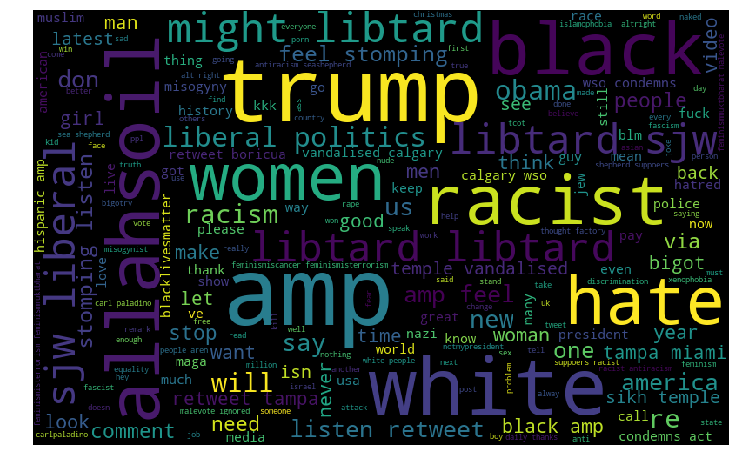

In [76]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,8))
plt.imshow(wc_sad)
# plt.imshow(wc_sad,ax=ax[0])
# plt.title(ax=ax[0])
plt.axis('off')
#doesn't look good with subplots :/
# plt.subplot(1,2,2)
# plt.plot(wc_sad)
# # plt.imshow(wc_sad,ax=ax[0])
# # plt.title(ax=ax[0])
# plt.axis('off')
# plt.show()
# n_topics=2
# wordcloud=[wc_happy,wc_sad]
# fig = plt.figure()
# for i in range(n_topics):
#     fig=plt.figure(figsize=(20,10))
#     ax = fig.add_subplot(2,1,i+1)
#     ax.imshow(wordcloud[0])
#     ax.axis('off')

Toxic Wordcloud

[]

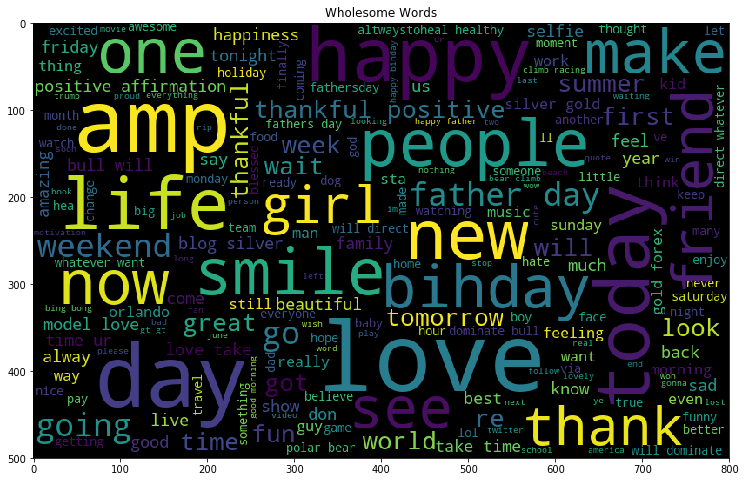

In [77]:
plt.figure(figsize=(16,8))
plt.imshow(wc_happy)
plt.title("Wholesome Words")
plt.plot()

In [78]:
# from sklearn.feature_extraction.text import CountVectorizer
# bow_vec=CountVectorizer(max_features=1000,stop_words='english')
# bow=bow_vec.fit_transform(df['cleaned tweets1'])

from sklearn.model_selection import train_test_split

# # train_bow = bow[:31962,:]
# # test_bow = bow[31962:,:]

# xtrain_bow,xvalid_bow,ytrain_bow,yvalid_bow=train_test_split(bow,df['label'],test_size=0.25)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# model=LogisticRegression()
# model.fit(xtrain_bow,ytrain_bow)
# preds=model.predict(xvalid_bow)

# f1_score(yvalid_bow,preds)

from sklearn.tree import DecisionTreeClassifier
# model=DecisionTreeClassifier()
# model.fit(xtrain_bow,ytrain_bow)
# preds=model.predict(xvalid_bow)
# f1_score(yvalid_bow,preds)

from sklearn.ensemble import RandomForestClassifier
# model=DecisionTreeClassifier()
# model.fit(xtrain_bow,ytrain_bow)
# preds=model.predict(xvalid_bow)
# f1_score(yvalid_bow,preds)

In [79]:
df.head()

,id,label,tweet,cleaned tweets,cleaned tweets1,stemmed,stemmed1
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ...",when a father is dysfunctional and is so self...,"[father, dysfunct, selfish, drag, kid, dysfunc...",father dysfunct selfish drag kid dysfunct run
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, lyft, credit, use, cause, offer, whee...",thanks for lyft credit i can t use cause they...,"[thank, lyft, credit, use, caus, offer, wheelc...",thank lyft credit use caus offer wheelchair va...
2,3,0,bihday your majesty,"[bihday, majesty]",bihday your majesty,"[bihday, majesti]",bihday majesti
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, ur]",model i love u take with u all the time in ur,"[model, love, u, take, u, time, ur]",model love u take u time ur
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]",factsguide society now motivation,"[factsguid, societi, motiv]",factsguid societi motiv


In [80]:
df_test.head()

,id,tweet,cleaned tweets,cleaned tweets1,stemmed,stemmed1
0,31963,#studiolife #aislife #requires #passion #dedic...,"[studiolife, aislife, requires, passion, dedic...",studiolife aislife requires passion dedicatio...,"[studiolif, aislif, requir, passion, dedic, wi...",studiolif aislif requir passion dedic willpow ...
1,31964,@user #white #supremacists want everyone to s...,"[white, supremacists, want, everyone, see, new...",white supremacists want everyone to see the n...,"[white, supremacist, want, everyon, see, new, ...",white supremacist want everyon see new bird movi
2,31965,safe ways to heal your #acne!! #altwaystohe...,"[safe, ways, heal, acne, altwaystoheal, health...",safe ways to heal your acne altwaystoheal heal...,"[safe, way, heal, acn, altwaystoh, healthi, heal]",safe way heal acn altwaystoh healthi heal
3,31966,is the hp and the cursed child book up for res...,"[hp, cursed, child, book, reservations, alread...",is the hp and the cursed child book up for res...,"[hp, curs, child, book, reserv, alreadi, yes, ...",hp curs child book reserv alreadi yes harrypot...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","[3rd, bihday, amazing, hilarious, nephew, eli,...",3rd bihday to my amazing hilarious nephew eli...,"[3rd, bihday, amaz, hilari, nephew, eli, ahmir...",3rd bihday amaz hilari nephew eli ahmir uncl d...


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer(max_features=10000,stop_words='english')
tfidf=tfidf_vec.fit_transform(df['stemmed1'])

In [82]:
xtrain_tfidf,xvalid_tfidf,ytrain_tfidf,yvalid_tfidf=train_test_split(tfidf,df['label'],test_size=0.25)
import numpy as np
# tfidf_vec=TfidfVectorizer(max_features=500,stop_words='english')
preds_lis=[]
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
preds_lis_modified=[]
model=RandomForestClassifier()
for i in range(10):
    model.fit(xtrain_tfidf,ytrain_tfidf)
    preds=model.predict_proba(xvalid_tfidf)
    prediction_int = preds[:,1] >= 0.4
    prediction_int =prediction_int.astype(np.int)
    preds_lis.append(f1_score(yvalid_tfidf,prediction_int))



In [83]:
preds_lis

[0.6624434389140272,
 0.6738738738738739,
 0.6721915285451197,
 0.6829710144927537,
 0.6557971014492754,
 0.6684636118598383,
 0.6751824817518249,
 0.6833631484794276,
 0.666056724611162,
 0.6834532374100719]

In [84]:
preds_lis_modified

[]

In [85]:
# import numpy as np
# # tfidf_vec=TfidfVectorizer(max_features=500,stop_words='english')
# preds_lis=[]
# from catboost import CatBoostClassifier
# preds_lis_modified=[]
# model=CatBoostClassifier(iterations=50, depth=3, learning_rate=0.1, loss_function='Logloss')
# for i in range(10):
#     model.fit(xtrain_tfidf,ytrain_tfidfcat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)
#     preds=model.predict_proba(xvalid_tfidf)
#     prediction_int = preds[:,1] >= 0.4
#     prediction_int =prediction_int.astype(np.int)
#     preds_lis_modified.append(f1_score(yvalid_tfidf,prediction_int))

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer(max_features=10000,stop_words='english')
tfidf_vec.fit(df['cleaned tweets1'])
# tfidf=tfidf_vec.transform(df['cleaned tweets1'])
doc_tfidf_matrix=tfidf_vec.transform(df_test['cleaned tweets1'])

In [91]:
preds_lis_modified=[]
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
for i in range(10):
    model.fit(xtrain_tfidf,ytrain_tfidf)
    preds=model.predict_proba(xvalid_tfidf)
    prediction_int = preds[:,1] >= 0.4
    prediction_int =prediction_int.astype(np.int)
    preds_lis_modified.append(f1_score(yvalid_tfidf,prediction_int))


In [92]:
preds_lis_modified

[0.5588235294117647,
 0.5588235294117647,
 0.5588235294117647,
 0.5588235294117647,
 0.5588235294117647,
 0.5588235294117647,
 0.5588235294117647,
 0.5588235294117647,
 0.5588235294117647,
 0.5588235294117647]

Used Random Forest after a lot of experimenting

In [93]:
# tfidf_vec=TfidfVectorizer(max_features=4000,stop_words='english')

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(tfidf,label)
preds=model.predict_proba(doc_tfidf_matrix)
prediction_int = preds[:,1] >= 0.4
prediction_int =prediction_int.astype(np.int)


# f1_score(yvalid_tfidf,preds)

In [94]:
df_results=pd.DataFrame(columns=['id','label'])
df_results['id']=df_test['id']
df_results['label']=prediction_int

In [96]:
df_results.head(10)

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
5,31968,0
6,31969,0
7,31970,1
8,31971,1
9,31972,0


In [ ]:
df_results.to_csv("results.csv",index=False)